# **Rosenbrock** **Optimization using GD, MGD, NGD**
This notebook demonstrated three optimization methods for solving the Rosenbrock function:

1. **Gradient Descent (GD)**
2. **Momentum Gradient Descent (MGD)**
3. **Nesterov Accelerated Gradient Descent (NGD)**

Each method was evaluated by visualizing the optimization paths on the Rosenbrock function's contour plot. The paths illustrate how different methods converge to the global minimum.

# **Importing** **Libraries**

This cell imports numpy for handling numerical operations and matplotlib.pyplot for generating visualizations. These libraries are essential for implementing and plotting the optimization algorithm paths.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# **Define the Rosenbrock Function**

This cell defines the Rosenbrock function, which is commonly used for testing optimization algorithms. It has a narrow, curved valley, which makes it a challenging function for optimization techniques. The global minimum of the function is located at (1, 1).

The mathematical form of the Rosenbrock function is:

$$ f(x, y) = (1 - x)^2 + 100(y - x^2)^2 $$

In [ ]:
# Define the Rosenbrock function
def rosenbrock(x, y):
    return (1 - x)**2 + 100 * (y - x**2)**2


# **Define the Gradient of the Rosenbrock Function**

This cell defines the gradient (partial derivatives) of the Rosenbrock function. The gradient represents the direction of steepest ascent, and its negative direction is used for gradient descent optimization.

The gradient of the Rosenbrock function is:

$$ \nabla f(x, y) = \left[ \frac{\partial f}{\partial x}, \frac{\partial f}{\partial y} \right] $$


In [ ]:
# Calculate gradients of the Rosenbrock function
def rosenbrock_grad(x, y):
    dx = -2 * (1 - x) - 400 * x * (y - x**2)
    dy = 200 * (y - x**2)
    return np.array([dx, dy])

# **Gradient Descent (GD)**

This cell implements the basic Gradient Descent algorithm. In each iteration, it performs the following steps:

1. Computes the gradient at the current point.
2. Updates the point by moving in the opposite direction of the gradient, scaled by the learning rate.
3. Appends the new point to the optimization path.

The iteration continues until either the gradient's norm is smaller than the tolerance or the maximum number of iterations is reached.

In [ ]:
# Gradient Descent
def gradient_descent(start, learning_rate, max_iter, tol):
    path = [start]
    x, y = start
    for i in range(max_iter):
        grad = rosenbrock_grad(x, y)
        new_x, new_y = x - learning_rate * grad[0], y - learning_rate * grad[1]
        path.append([new_x, new_y])
        if np.linalg.norm(grad) < tol:
            break
        x, y = new_x, new_y
    return np.array(path)

# **Momentum Gradient Descent (MGD)**

This cell implements Momentum Gradient Descent. Momentum helps to accelerate the optimization process by smoothing oscillations and improving convergence speed, especially in areas with high curvature like the Rosenbrock function.

In each iteration, the algorithm:

1. Calculates the gradient at the current point.
2. Updates the velocity by combining the previous velocity (scaled by momentum) with the gradient (scaled by the learning rate).
3. Moves the point according to the updated velocity vector.

In [ ]:
# Momentum Gradient Descent
def momentum_gradient_descent(start, learning_rate, momentum, max_iter, tol):
    path = [start]
    x, y = start
    velocity = np.array([0.0, 0.0])
    for i in range(max_iter):
        grad = rosenbrock_grad(x, y)
        velocity = momentum * velocity - learning_rate * grad
        new_x, new_y = x + velocity[0], y + velocity[1]
        path.append([new_x, new_y])
        if np.linalg.norm(grad) < tol:
            break
        x, y = new_x, new_y
    return np.array(path)

# **Nesterov Accelerated Gradient Descent (NGD)**

This cell implements Nesterov Accelerated Gradient Descent, which improves upon standard momentum by calculating the gradient at a lookahead point. This provides a more accurate estimate of the direction to move, leading to faster convergence and improved stability.

In each iteration, the algorithm:

1. Moves to a lookahead position based on the current velocity.
2. Calculates the gradient at this lookahead point.
3. Updates the velocity based on both the momentum and the new gradient.
4. Updates the point according to the velocity vector.

In [ ]:
# Nesterov Accelerated Gradient Descent
def nesterov_gradient_descent(start, learning_rate, momentum, max_iter, tol):
    path = [start]
    x, y = start
    velocity = np.array([0.0, 0.0])
    for i in range(max_iter):
        lookahead_x, lookahead_y = x + momentum * velocity[0], y + momentum * velocity[1]
        grad = rosenbrock_grad(lookahead_x, lookahead_y)
        velocity = momentum * velocity - learning_rate * grad
        new_x, new_y = x + velocity[0], y + velocity[1]
        path.append([new_x, new_y])
        if np.linalg.norm(grad) < tol:
            break
        x, y = new_x, new_y
    return np.array(path)


# **Run the Optimization Methods and Plot**

This cell defines the parameters for the optimization algorithms and runs them:

- **Starting Point**: Initial coordinates for the optimization.
- **Learning Rate**: Step size for each method.
- **Momentum**: Used for Momentum and Nesterov methods.
- **Max Iterations**: Maximum allowed iterations.
- **Tolerance**: Convergence threshold for gradient magnitude.

The cell also generates a contour plot of the Rosenbrock function and visualizes the paths taken by the three optimization algorithms (GD, MGD, and NGD). The starting point is marked, and each path is labeled.

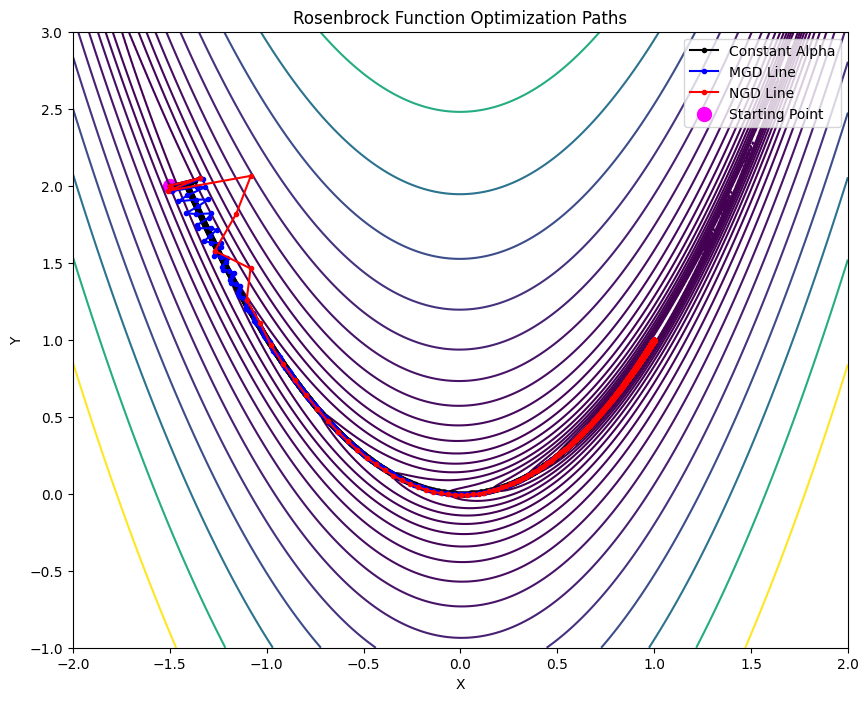

In [ ]:
# Parameters
start_point = np.array([-1.5, 2.0])  # Starting point
learning_rate = 0.001                # Learning rate for gradient descent
momentum = 0.9                        # Momentum factor
max_iter = 10000                      # Maximum number of iterations
tol = 1e-6                            # Tolerance for convergence



# Run the optimization with different methods
gd_path = gradient_descent(start_point, learning_rate, max_iter, tol)
mgd_path = momentum_gradient_descent(start_point, learning_rate, momentum, max_iter, tol)
ngd_path = nesterov_gradient_descent(start_point, learning_rate, momentum, max_iter, tol)

# Plot the Rosenbrock function and optimization paths
x = np.linspace(-2, 2, 400)
y = np.linspace(-1, 3, 400)
X, Y = np.meshgrid(x, y)
Z = rosenbrock(X, Y)

plt.figure(figsize=(10, 8))
plt.contour(X, Y, Z, levels=np.logspace(-1, 3, 20), cmap="viridis")
plt.plot(gd_path[:, 0], gd_path[:, 1], 'k', label="Constant Alpha", marker='o', markersize=3)
plt.plot(mgd_path[:, 0], mgd_path[:, 1], 'b', label="MGD Line", marker='o', markersize=3)
plt.plot(ngd_path[:, 0], ngd_path[:, 1], 'r', label="NGD Line", marker='o', markersize=3)
plt.scatter(*start_point, color='magenta', s=100, label="Starting Point")

# Labels and legend
plt.title("Rosenbrock Function Optimization Paths")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

**Done by K. Sri Chaitan (2022BCD0038)**
